In [1]:
# Author: Daniel Zurawski
# Author: Keshav Kapoor
# Organization: Fermilab
# Grammar: Python 3.6.1

%matplotlib notebook
import keras # Neural network models
import tensorflow as tf
import pandas as pd # Data frames
import numpy as np  # numerical python
from tracker3d import loader, utils, metrics

Using TensorFlow backend.


In [2]:
# How hit columns should be ordered.
ORDERING = ("phi", "r", "z")
filename = "nevall_tpeall_tsall.npz"

# True if you want to load from json. False if you want to create your own data.
load_from_file = True

if load_from_file:  # Much faster than creating your own!
    train, target = loader.from_file(filename)
else:
    frame = pd.read_csv("datasets/standard_curves100MeV.csv")
    train, target = loader.from_frame(frame, nev=99999, tpe=1000, ts=1000,
                                      variable_data=True, verbose=True, order=ORDERING)
    loader.to_file(train, target, filename)

Event 1465


<IPython.core.display.Javascript object>


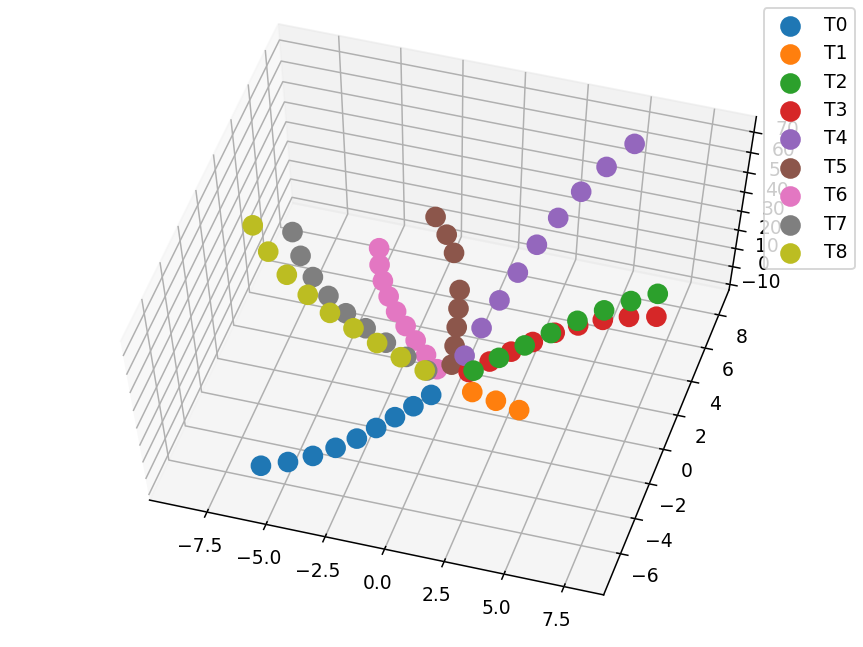

In [3]:
event_number = np.random.randint(0, len(train))
print("Event {}".format(event_number))
utils.plot3d(train[event_number], target[event_number], target[event_number], order=ORDERING)

In [4]:
utils.display_side_by_side(train[event_number], target[event_number], order=ORDERING)

,phi,r,z
0,-2.218245,9.0,9.479628
1,-2.169351,8.0,8.426336
2,-2.128796,7.0,7.373044
3,-2.098017,6.0,6.319752
4,-2.072593,5.0,5.266460
5,-2.061727,4.0,4.213168
6,-2.050632,3.0,3.159876
7,-2.036160,2.0,2.106584
8,-2.025593,1.0,1.053292
9,0.003548,3.0,-7.351659


In [5]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [ ]:
input_shape  = train[0].shape # Shape of an event.
output_shape = target.shape[2] # Number of tracks per event

batch_size = 256
epochs     = 4
valsplit   = 0.80
opt        = keras.optimizers.RMSprop(lr=0.01)
model = Sequential()
model.add(Dense(output_shape, input_shape=input_shape, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.summary()

In [ ]:
modelpath = "my_model.h5"
hist = model.fit(train, target, epochs=epochs, batch_size=batch_size,
                    verbose=True, validation_split=valsplit,
                    callbacks=[keras.callbacks.ModelCheckpoint(filepath=modelpath, verbose=True)])

In [ ]:
predictions = model.predict(train, batch_size=batch_size)
#loader.to_file(train, predictions, "nev1024_tpe6_ts6_p.json")
#_, predictions = loader.from_file("nev1024_tpe6_ts6_p.json")

In [ ]:
event_number = np.random.randint(0, len(train))
print("Event {}".format(event_number))
utils.plot3d(train[event_number], predictions[event_number], target[event_number], order=ORDERING)
utils.display_side_by_side(train[event_number], target[event_number], predictions[event_number], order=ORDERING)
print(metrics.discrete_accuracy(train[event_number], predictions[event_number], target[event_number]))

In [ ]:
utils.print_scores(model, train, target, batch_size)
utils.graph_losses([("Categorical Cross Entropy", hist)])